# Lab 5

## Jennifer Vo, lab partners with William Olsen

## Introduction

In this lab, we will be starting a 4-part lab sequence about particle physics. My lab partner and I chose to work with the LHC particle physics datasets. We will not be working with real LHC data, but instead looking at training datasets in Lab 5.

### Large Hadron Collider
The Large Hadron Collider (LHC) is the world's largest and highest-energy particle accelerator below ground near the France-Switzerland border. At the LHC, the ATLAS is one of the detectors used to investigate different physics. Particle accelerators recreate natural phenomena, where particles travel at high energies and collide, producing different particles, which in turn decay and have their own momenta.
https://home.cern/science/experiments/atlas and https://home.cern/science/accelerators/large-hadron-collider/safety-lhc

### Particle Collisions, Decays, and The Higgs Boson
When particles collide, we can use kinematics and special relativity theory to describe the transfer of energy and momenta. We can also use particle physics to describe the different decays into new particles.

On July 4th, 2012 scientists working at CERN on the LHC Atlas and CMS experiments announced the discovery of a particle in the mass region of 125 GeV, consistent with the theorized Higgs boson. The Higgs boson is the first elementary particle seen to have no spin. It is the quantum particle of the Higgs field, which is a scalar field. Elementary particles which interact more with the Higgs field have more mass.
https://home.cern/science/physics/higgs-boson

In this 4-part lab sequence, my lab partner and I will be working with a training set and pseudo-experiment data simulating the Higgs boson signal and background data to try to find the Higgs boson, similar to what the scientists working at CERN's LHC did upon their discovery of the particle consistent with the Higgs boson.

### Experimental Set Up
The Higgs boson is very unstable, decaying into other particles almost immediately. Elementary particles such as quarks and leptons result from the Higgs boson decay, and their paths and energies are subsequently recorded by the ATLAS detector. It is these measurements which are then analyzed to determine if the elementary particles resulted in the decay of a particle consistent with the Higgs boson, or not. 
https://en.wikipedia.org/wiki/Higgs_boson#Properties_of_the_Higgs_boson

- Detector and coordinates
Now, I will explain some basic experimental set up at ATLAS, and how the measurements are collected.
The LHC is in a shape of a ring, where the particles are accelerated through to collide. For the Higgs boson measurement, protons are the particles being accelerated. The pipe is centered along the cylindrical axis of symmetry of the detector. The z axis is defined as the path along which protons are accelerated. After collision, the particles emerge in all directions and hit the detector in all directions. These particles' paths and energies are then measured. 

- Jets
- Subjets and substructure

Protons are made up of elementary particles, including soft gluons, harder gluons, quarks and antiquarks. When protons are accelerated and collide, some of these particles will hit each other. The soft gluons will scatter, but we are interested when the harder gluons and quarks hit each other because those will result in a significant amount of momentum and energy in the direction transverse to the beams.

A jet is a collection of particles that go towards the same direction in the detector.

There are two angles, phi (azimuthal angle) and theta (polar angle) used to describe the axis along which the jet of measurement is located. 


- Triggering and data collection

- read about particle accelerators and jets, we are trying to test new theories
- pp collider -> a bunch of many protons (hard scatter - gluons and quarks) large momentum transfer and high energy event occurs. all kinds of particles can be created, each leaving different signatures on the detectors. particle decays etc. can create a higgs boson, which decays into some Z quarks -> ??, things that can be measured
- explain general accelerator concepts (writing part)
- we compare what we saw with what our model is.
- second part: plotting the data, don't need to explain in detail every single parameter

(most of the lab is explaining what the data is ABOUT - can write about a sentence on each variable)

Lab 5a. Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

Lab 5b. Explore the training data by addressing following questions:

- Do all features provide discrimination power between signal and background? (plot histograms for each of the variables, comparing qcd and higgs. 14 total plots. discuss after each one the observations (peak location, width)
- Are there correlations among these features? (discuss overall, which variables can be discriminated between signal and background? do these seem correlated? e.g. eta and theta should be correlated, not sure where theta is)
- Compute expected discovery sensitivity by normalizing each sample appropriately. (see 'expected yields' below) (build a background pdf with all the variables, compute number of signals beyond 5 sigma which should match expected yield) - using the expected yields, determine the significance (sigma)
- Develop a plan to optimize the discovery sensitivity by applying selections to these features. (just a description of plan; can narrow down which variables we want to build into our model by filtering out the data; e.g. considering only data with mass between 100 and 150.

Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'

Notes on the variables:
- pt = transverse momentum
- eta = pseudorapidity; a geometric quantity; a function of the polar angle theta (0, pi) with eta range of (-inf,inf). eta = 0 at theta = pi/2. pseudorapidity is only equal to rapidity for massless particles.
- phi = azimuthal angle; goes around the beam.
- mass = total mass of all particles produced from the collision
- ee2 = 
- ee3 = 
- d2 = 
- angularity = largely uncorrelated with all other variables
t's are the subjet-tiness
subjet structure (1 jet -> looks like 2 jets) because they are so aligned (collimated)
t's = taus; how well the data is defined to show multiple jets?
1 jet -> cone on the data, calculate how far everything is from the center.
- t1 = using 1 jet
- t2 = using 2 jets
- t3 = using 3 jets
- t21 = ratio of t1 and t2
- t32 = ratio of t3 and t2
- KtDeltaR = ∆R of two subjets within the large-R jet

luminosity = 

In [42]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import math
import pickle

#this sets the size of the plots to something useful
plt.rcParams["figure.figsize"] = (7,4)

There are two groups of datasets in different pT ranges. For each pT range, there is simulated data and pseudo-experiment data. In this lab we are working with the following data files:

low PT: Sample_pt_250_500
- Training sample and normalization
    - higgs_100000_pt_250_500.pkl (Expected yields  N_higgs=100 )
    - qcd_100000_pt_250_500.pkl (Expected yields  N_qcd=20000 )

high PT: Sample_pt_1000_1200
- Training sample and normalization
    - higgs_100000_pt_1000_1200.pkl (Expected yields  N_higgs=50 ) 
    - qcd_100000_pt_1000_1200.pkl (Expected yields  N_qcd=2000 )

In [43]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("qcd250-500.pkl",'rb')
qcd_dict = pickle.load(infile)

# list all keys of the files
qcd_dict.keys()

# open the file of interest, and use pickle loading
infile = open ("higgs250-500.pkl",'rb')
higgs_dict = pickle.load(infile)

# list all keys of the files
higgs_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [44]:
print(len(higgs_dict['pt']))
print(len(qcd_dict['pt']))

100000
100000


There are 100k total events in both the background (QCD) data set and the signal (Higgs) dataset, each with associated variables (14 total var). What is the interpretation? The experiment was run and 100,000 measurements were collected.

In [45]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
    print(higgs_dict['mass'][i], higgs_dict['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


Let us try plotting histograms of the variables. Make subplots.

In [77]:
def plot_qcd_higgs(var, unit):
    plt.subplot(2, 1, 1)
    plt.hist(qcd_dict[f'{var}'], bins = 100, label = 'Background')
    plt.xlabel(f'{var} ({unit})', fontsize = 15)
    plt.ylabel('Event counts', fontsize = 15)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.hist(higgs_dict[f'{var}'], bins = 100, label = 'Higgs signal')
    plt.xlabel(f' {var} ({unit})', fontsize = 15)
    plt.ylabel('Event counts', fontsize = 15)
    plt.legend()
    plt.show()
    
def plot_difference(var, unit):
    x, diff = np.histogram(qcd_dict[f'{var}'], bins = 100)
    plt.plot(x, diff)
    plt.xlabel(f' {var} ({unit})', fontsize = 15)
    plt.ylabel('Event counts', fontsize = 15)
    plt.show()

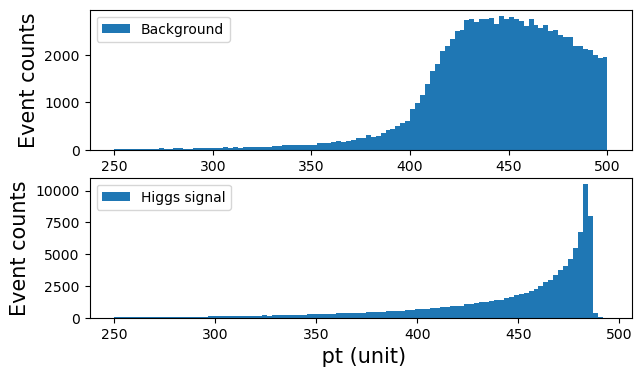

In [79]:
plot_qcd_higgs('pt', 'unit')

We observe that in both datasets, the minimum transverse momentum is 250, and the maximum transverse momentum 500. In the background, observe that the majority of the measurements lie in the 400-500 range of transverse momentum with a peak event count at 450. However, in the signal, the measurements have a peak event count at around 460.

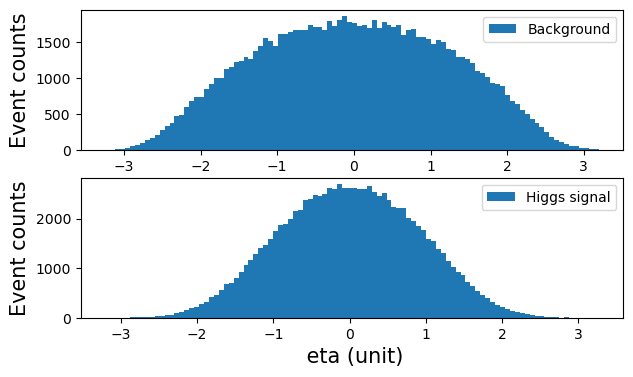

In [54]:
plot_qcd_higgs('eta', 'unit')

Observations about eta here.

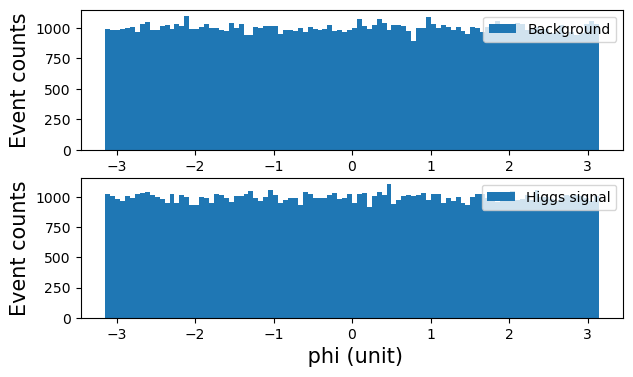

In [55]:
plot_qcd_higgs('phi', 'unit')

The plots of phi look approximately the same.

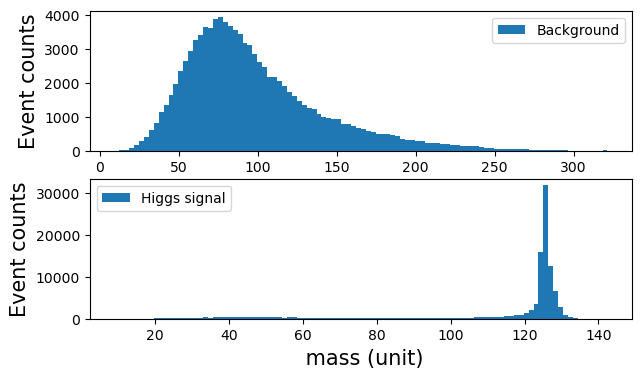

In [56]:
plot_qcd_higgs('mass', 'unit')

In the background, the mass of the particles measured range from 0 to slightly over 300 (units?), with a peak event count at approximately 75 mass units. However, in the signal dataset there is a peak event counts at about 125 mass units. There is a large distinction here between the background and signal.

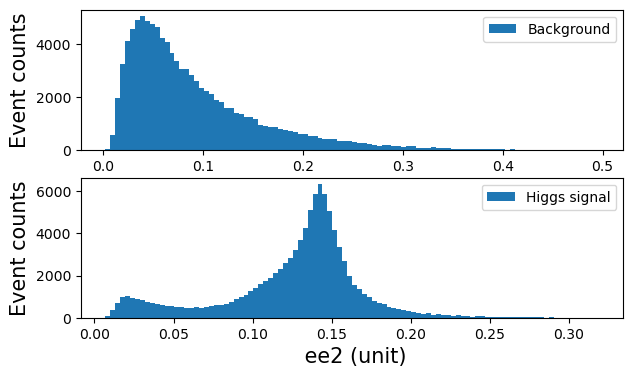

In [57]:
plot_qcd_higgs('ee2', 'unit')

Observations here.

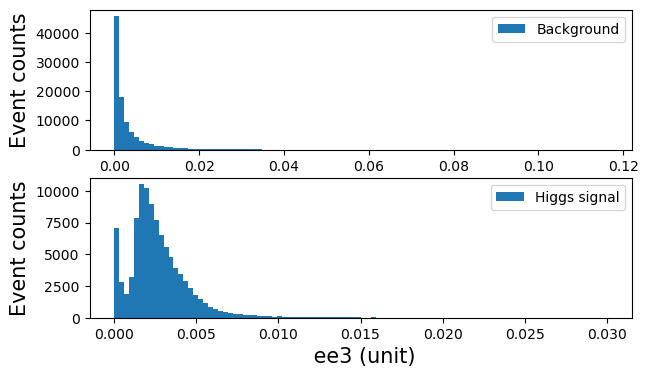

In [58]:
plot_qcd_higgs('ee3', 'unit')

Observations here.

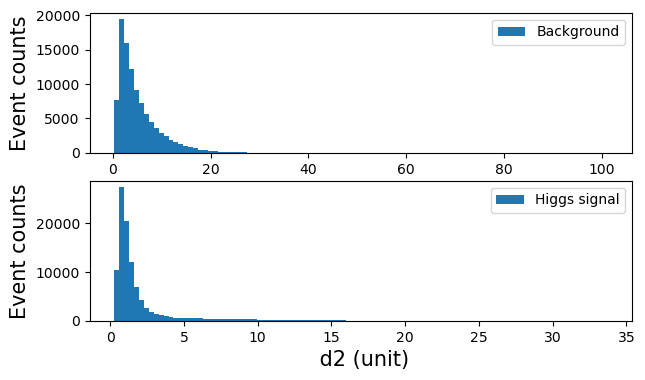

In [59]:
plot_qcd_higgs('d2', 'unit')

Observations here.

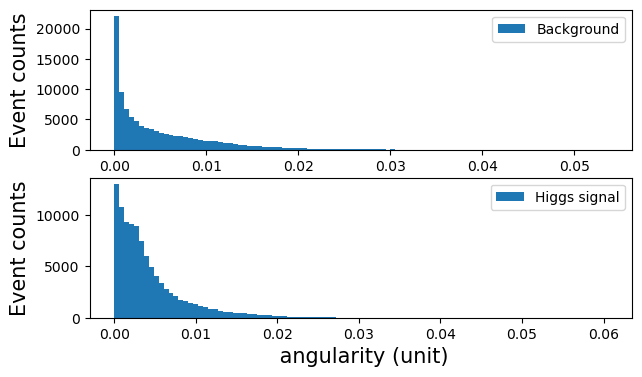

In [60]:
plot_qcd_higgs('angularity', 'unit')

Observations here. Appears exponential, signal with greater width. May not be a good choice to try to distinguish data; looks too similar.

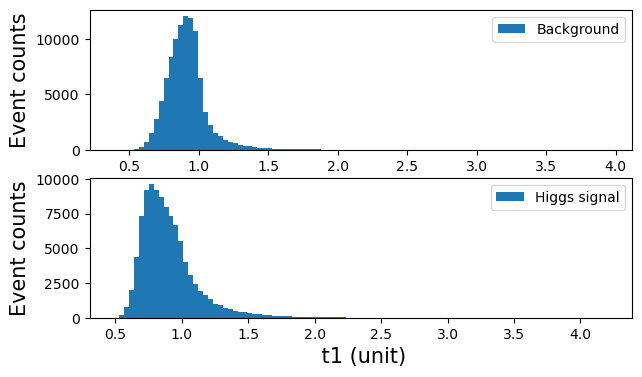

In [61]:
plot_qcd_higgs('t1', 'unit')

Observations here.

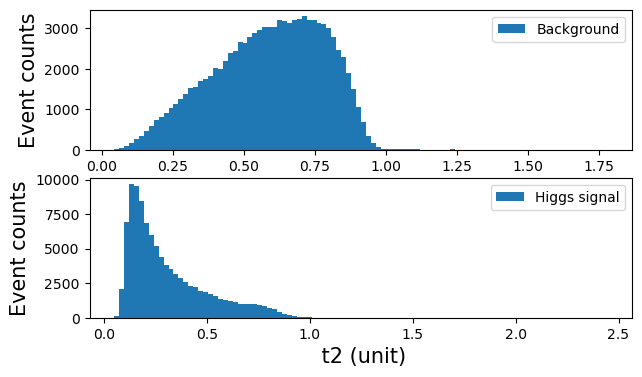

In [62]:
plot_qcd_higgs('t2', 'unit')

Observations here.

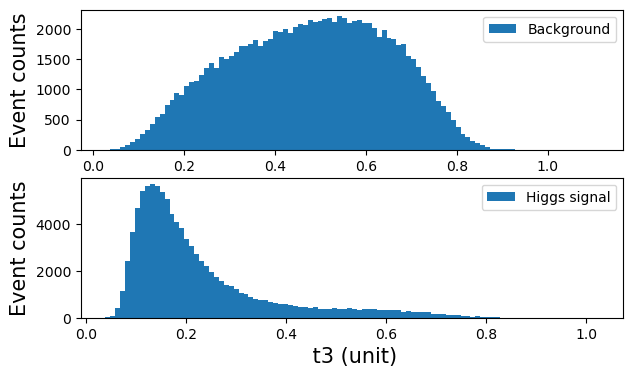

In [63]:
plot_qcd_higgs('t3', 'unit')

Observations here.

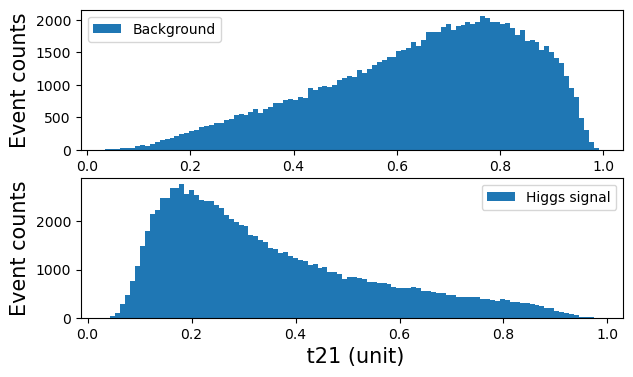

In [64]:
plot_qcd_higgs('t21', 'unit')

Observations here. Tau 2 is much better than tau 1 - to distinguish background and signal.

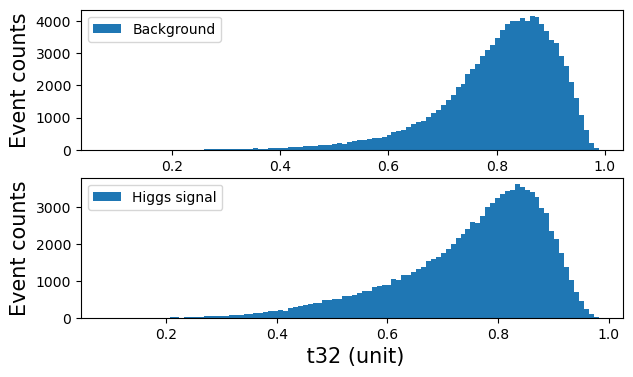

In [65]:
plot_qcd_higgs('t32', 'unit')

Observations here - approx the same.
t32 represents the ratio of the jet substructure blah ablh 
It doesn't matter whether you choose tau 2 or tau 3.

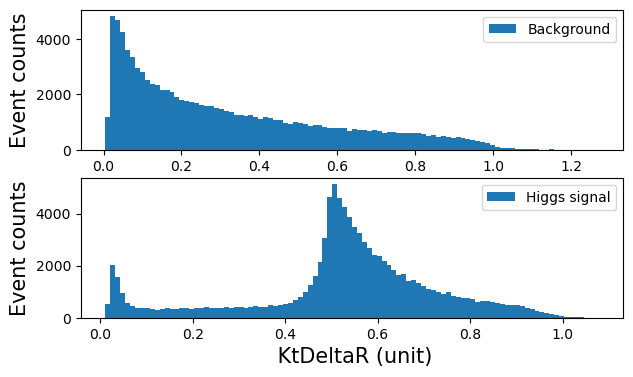

In [66]:
plot_qcd_higgs('KtDeltaR', 'unit')

Observations here.